In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

[(0.8595590081281825-4.491906499537457e-11j), (0.5606278802169405-1.261445470648881e-09j), (0.3835013738795062+1.554616678445253e-11j)]
[(0.9999864031602508-2.7291645506022366e-14j), (0.9940850380367344-1.6254116108616046e-12j), (0.9801132339559304-7.409315435497055e-11j)]
[(0.542018697121918+3.626084224550574e-10j), (0.4212362853467087+2.1684007714406484e-10j), (0.07200658611890359-6.738894303692788e-10j)]


C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


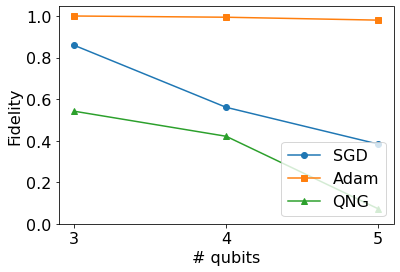

In [29]:
ansatz = 'walltoall'
qubits = [3,4,5]
i = 2 # num layer
for optimizer in ['sgd', 'adam', 'qng']:

    fidelitiess = []
    for j in qubits:
        if optimizer == 'sgd':
            marker = 'o'
            path = "../../experiments/tomography/tomography_" + ansatz + "_" + str(i) + '/' + str(j) + '/fidelities.csv'
        else:
            if optimizer == 'adam':
                marker = 's'
            else:
                marker = '^'
            path = "../../experiments/tomography/tomography_" + ansatz + "_" + str(i) + '/' + str(j) + '/fidelities_' + optimizer + '.csv'
        fidelities = pd.read_csv(path, sep=",", header=None)
        fidelities = fidelities.applymap(lambda s: complex(s.replace('i', 'j'))).values
        fidelitiess.append(np.max(fidelities))
    if optimizer == 'sgd':
        label = 'SGD'
    if optimizer == 'adam':
        label = 'Adam'
    if optimizer == 'qng':
        label = 'QNG'
    print(fidelitiess)
    plt.plot(range(3, 6), fidelitiess, label = label, marker = marker)

plt.xticks(np.arange(3, 6, 1), size = 16)
plt.yticks(np.arange(0, 1.2, 0.2), size = 16)
plt.xlabel('# qubits', size = 16)
plt.ylabel('Fidelity', size = 16)
plt.legend(prop={'size': 16}, loc=4)
plt.savefig("./images/" + ansatz + '_compare.svg', format = 'svg', dpi = 1000)
plt.show()

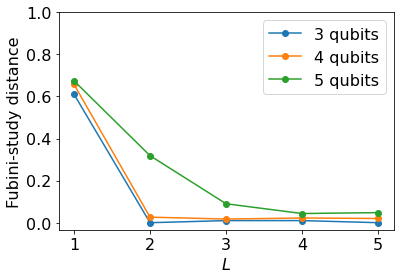

In [77]:
ansatz = 'wchain'
optimizer = 'adam'
qubits = [3,4,5]
for j in qubits:
    loss_fubini_studys = []
    for i in range(1, 6):
        if optimizer == 'sgd':
            path = "../../experiments/tomography/tomography_" + ansatz + "_" + str(i) + '/' + str(j) + '/loss_values.csv'
        else:
            path = "../../experiments/tomography/tomography_" + ansatz + "_" + str(i) + '/' + str(j) + '/loss_values_' + optimizer + '.csv'
        loss_values = pd.read_csv(path, sep=",", header=None).to_numpy()
        loss_fubini_study = np.sqrt(loss_values)
        loss_fubini_studys.append(np.min(loss_fubini_study))
    plt.plot(range(1, 6), loss_fubini_studys, label = str(j) + ' qubits', marker = 'o')

plt.xticks(np.arange(1, 6, 1), size = 16)
plt.yticks(np.arange(0, 1.2, 0.2), size = 16)
plt.xlabel('$L$', size = 16)
plt.ylabel('Fubini-study distance', size = 16)
plt.legend(prop={'size': 16}, loc=1)
plt.savefig("./images/" + ansatz + '_' + optimizer + '.svg', format = 'svg', dpi = 1000)
plt.show()

C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


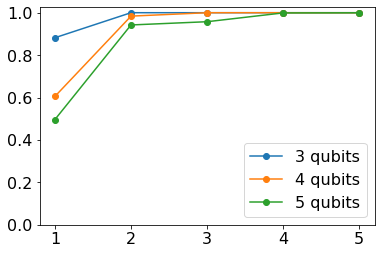

In [3]:
ansatz = 'wchain'
optimizer = 'adam'
qubits = [3,4,5]
for j in qubits:
    fidelitiess = []
    for i in range(1, 6):
        if optimizer == 'sgd':
            path = "../../experiments/tomography/tomography_" + ansatz + "_" + str(i) + '/' + str(j) + '/fidelities.csv'
        else:
            path = "../../experiments/tomography/tomography_" + ansatz + "_" + str(i) + '/' + str(j) + '/fidelities_' + optimizer + '.csv'
        fidelities = pd.read_csv(path, sep=",", header=None)
        fidelities = fidelities.applymap(lambda s: complex(s.replace('i', 'j'))).values
        fidelitiess.append(np.max(fidelities))
    plt.plot(range(1, 6), fidelitiess, label = str(j) + ' qubits', marker = 'o')


plt.xticks(np.arange(1, 6, 1), size = 16)
plt.yticks(np.arange(0, 1.2, 0.2), size = 16)
# plt.xlabel('$L$', size = 16) 
# plt.ylabel('Fidelity', size = 16)
plt.legend(prop={'size': 16}, loc=4)
plt.savefig("./images_fidelity/" + ansatz + '_' + optimizer + '.svg', format = 'svg', dpi = 1000)
plt.show()

In [ ]:


path = "../../experiments/tomography_wchain_1/3/loss_values.csv"
loss_values = pd.read_csv(path, sep=",", header=None)
path = "../../experiments/tomography_wchain_1/4/loss_values.csv"
loss_values2 = pd.read_csv(path, sep=",", header=None)
path = "../../experiments/tomography_wchain_1/5/loss_values.csv"
loss_values3 = pd.read_csv(path, sep=",", header=None)
path = "../../experiments/tomography_wchain_2/3/loss_values.csv"


plt.plot(loss_values, label = '3 qubits')
plt.plot(loss_values2, label = '4 qubits')
plt.plot(loss_values3, label = '5 qubits')
plt.xlabel('Iteration')
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
plt.show()

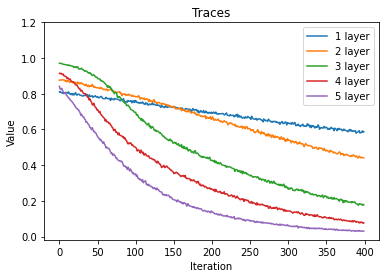

In [24]:
tracess = []

for i in range(1, 6):
    path = "../../experiments/tomography/tomography_walltoall_" + str(i) + '/' + str(4) + '/loss_values.csv'
    loss_values = pd.read_csv(path, sep=",", header=None)
    plt.plot(loss_values, label = str(i) + ' layer')

plt.xlabel('Iteration')
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.title('Traces')
plt.legend()
plt.show()

C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to rea

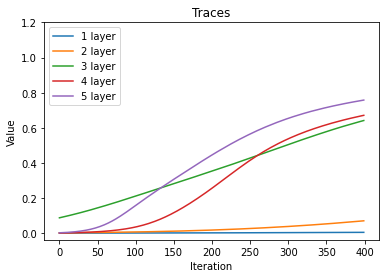

In [28]:
tracess = []

for i in range(1, 6):
    path = "../../experiments/tomography/tomography_walltoall_" + str(i) + '/' + str(5) + '/fidelities_qng.csv'
    fidelities = pd.read_csv(path, sep=",", header=None)
    fidelities = fidelities.applymap(lambda s: complex(s.replace('i', 'j'))).values
        
    plt.plot(fidelities, label = str(i) + ' layer')

plt.xlabel('Iteration')
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.title('Traces')
plt.legend()
plt.show()

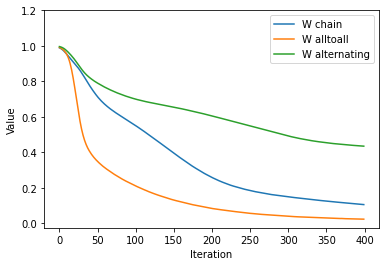

In [2]:
plt.plot(traces1, label = 'W chain')
plt.plot(traces2, label = 'W alltoall')
plt.plot(traces3, label = 'W alternating')
plt.xlabel('Iteration')
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
plt.show()

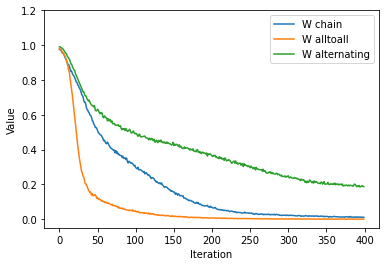

In [3]:
plt.plot(loss_values1, label = 'W chain')
plt.plot(loss_values2, label = 'W alltoall')
plt.plot(loss_values3, label = 'W alternating')
plt.xlabel('Iteration')
plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Value')
plt.legend()
plt.show()